In [1]:
import tensorflow as tf

In [7]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [8]:
layer(tf.zeros([10,5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [9]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.2328608 , -0.06497598,  0.31680185, -0.1346716 ,  0.48235732,
          0.3016917 ,  0.5491534 , -0.499542  , -0.5463744 ,  0.42063135],
        [ 0.0981921 ,  0.22347933, -0.4429837 , -0.4704095 , -0.4112922 ,
         -0.22809589, -0.35945857,  0.58214575, -0.11086696, -0.00499189],
        [-0.62725645,  0.05996299, -0.38199446, -0.4293489 , -0.23272285,
         -0.5825742 ,  0.27517027,  0.22011882, -0.0198155 , -0.3547295 ],
        [-0.42266923,  0.06271261, -0.25243703, -0.47594196,  0.50330025,
          0.3277939 ,  0.59013206, -0.5021075 , -0.01775664, -0.02961332],
        [ 0.511972  ,  0.41302472,  0.08299494,  0.54267126, -0.06407893,
          0.30245817, -0.01253784,  0.07134664,  0.2311536 , -0.2628653 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [10]:
layer.kernel

<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.2328608 , -0.06497598,  0.31680185, -0.1346716 ,  0.48235732,
         0.3016917 ,  0.5491534 , -0.499542  , -0.5463744 ,  0.42063135],
       [ 0.0981921 ,  0.22347933, -0.4429837 , -0.4704095 , -0.4112922 ,
        -0.22809589, -0.35945857,  0.58214575, -0.11086696, -0.00499189],
       [-0.62725645,  0.05996299, -0.38199446, -0.4293489 , -0.23272285,
        -0.5825742 ,  0.27517027,  0.22011882, -0.0198155 , -0.3547295 ],
       [-0.42266923,  0.06271261, -0.25243703, -0.47594196,  0.50330025,
         0.3277939 ,  0.59013206, -0.5021075 , -0.01775664, -0.02961332],
       [ 0.511972  ,  0.41302472,  0.08299494,  0.54267126, -0.06407893,
         0.30245817, -0.01253784,  0.07134664,  0.2311536 , -0.2628653 ]],
      dtype=float32)>

In [11]:
layer.bias

<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [31]:
class MyDenseLayer1(tf.keras.layers.Layer):
    
    def __init__(self,num_output):
        super(MyDenseLayer1,self).__init__()
        self.num_output = num_output
        
    def build(self,input_shape):
        self.kernel = self.add_weight('kernel',shape=[input_shape[-1],self.num_output])
        self.bias = self.add_weight('bias',shape=(self.num_output,))
    
    def call(self,input):
        return tf.matmul(input,self.kernel) + self.bias

In [45]:
class MyDenseLayer2(tf.keras.layers.Layer):
    
    def __init__(self,num_output):
        super(MyDenseLayer2,self).__init__()
        self.num_output = num_output
        
    def build(self,input_shape):
        self.kernel = self.add_weight('kernel',shape=[input_shape[-1],self.num_output])
        self.bias = self.add_weight('bias',shape=(self.num_output,))
        
    def call(self,input):
        return tf.matmul(input,self.kernel)+ self.bias

In [46]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1 = MyDenseLayer1(10)
        self.dense2 = MyDenseLayer2(15)
        
    def call(self,input):
        x = self.dense1(input)
        x =self.dense2(x)
        return x

In [47]:
model = MyModel()

In [48]:
model(tf.zeros([10,15]))

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[-0.41919643,  0.7963176 ,  0.4702506 , -0.01909292,  0.0414294 ,
         0.9575258 , -0.48917586, -0.01930887, -0.1490544 , -0.26911145,
        -0.6199968 , -0.24243933,  0.8204367 ,  0.61163855,  0.12772328],
       [-0.41919643,  0.7963176 ,  0.4702506 , -0.01909292,  0.0414294 ,
         0.9575258 , -0.48917586, -0.01930887, -0.1490544 , -0.26911145,
        -0.6199968 , -0.24243933,  0.8204367 ,  0.61163855,  0.12772328],
       [-0.41919643,  0.7963176 ,  0.4702506 , -0.01909292,  0.0414294 ,
         0.9575258 , -0.48917586, -0.01930887, -0.1490544 , -0.26911145,
        -0.6199968 , -0.24243933,  0.8204367 ,  0.61163855,  0.12772328],
       [-0.41919643,  0.7963176 ,  0.4702506 , -0.01909292,  0.0414294 ,
         0.9575258 , -0.48917586, -0.01930887, -0.1490544 , -0.26911145,
        -0.6199968 , -0.24243933,  0.8204367 ,  0.61163855,  0.12772328],
       [-0.41919643,  0.7963176 ,  0.4702506 , -0.01909292,  0.0414294

In [49]:
model.summary()

Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense_layer1_3 (MyDenseLa multiple                  160       
_________________________________________________________________
my_dense_layer2_3 (MyDenseLa multiple                  165       
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [21]:
layer(tf.zeros([10,7]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
        -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
       [-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.40558

In [22]:
layer.kernel

<tf.Variable 'my_dense_layer_1/kernel:0' shape=(7, 10) dtype=float32, numpy=
array([[ 0.26578254, -0.41127   , -0.30584094, -0.09533963, -0.2502443 ,
         0.10253191, -0.05950624, -0.22703403, -0.5386928 ,  0.02775836],
       [-0.25580204, -0.18040994,  0.25662947,  0.21409786, -0.4802719 ,
        -0.26723918, -0.5059904 , -0.26584342, -0.5680901 , -0.36377695],
       [ 0.11307514,  0.20810956, -0.54478675,  0.33807522,  0.58198977,
         0.21009946, -0.07105291,  0.01974785,  0.2801807 ,  0.40807283],
       [-0.5007649 , -0.56306815, -0.2423816 , -0.36074808, -0.06820971,
        -0.53173345, -0.44063103,  0.41579926,  0.18247747,  0.27499563],
       [ 0.23394346,  0.33765256,  0.1709891 , -0.33936852, -0.10172936,
        -0.01818734,  0.0610112 ,  0.26814085,  0.03028369,  0.39274526],
       [-0.10390896, -0.5854327 ,  0.40704727, -0.32967272,  0.5514188 ,
        -0.49639186,  0.2672311 ,  0.1551674 , -0.29433593,  0.58263004],
       [-0.13603118,  0.09059179, -0.3587

In [24]:
layer.bias

<tf.Variable 'my_dense_layer_1/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.38094074, -0.01098889,  0.2774071 ,  0.38506562,  0.4055807 ,
       -0.3543469 ,  0.53414595,  0.06991172,  0.01898593,  0.3733073 ],
      dtype=float32)>

In [23]:
print([v.name for v in layer.trainable_variables])

['my_dense_layer_1/kernel:0', 'my_dense_layer_1/bias:0']


In [50]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [51]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [52]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

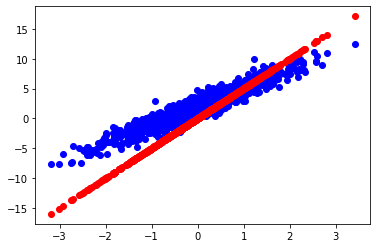

Current loss: 8.789408


In [53]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [54]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.78941
Epoch  1: W=4.61 b=0.40, loss=5.94857
Epoch  2: W=4.29 b=0.72, loss=4.13852
Epoch  3: W=4.04 b=0.98, loss=2.98524
Epoch  4: W=3.84 b=1.18, loss=2.25040
Epoch  5: W=3.68 b=1.34, loss=1.78218
Epoch  6: W=3.55 b=1.47, loss=1.48385
Epoch  7: W=3.45 b=1.57, loss=1.29375
Epoch  8: W=3.37 b=1.66, loss=1.17262
Epoch  9: W=3.30 b=1.72, loss=1.09544


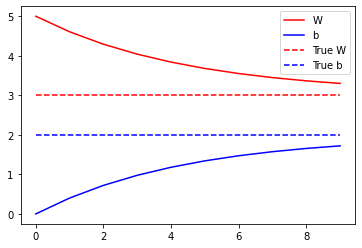

In [55]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()
